In [3]:
import json
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score


In [5]:
with open("backup_18.txt", "r") as f1:
    results = json.load(f1)
with open("backup_18_2.txt", "r") as f2:
    results.extend(json.load(f2))

len(results)

45

In [10]:
jsonlikecontent = dict()
for key in results[0].keys():
    jsonlikecontent[key] = [i[key] for i in results]
df = pd.DataFrame(data=jsonlikecontent)

In [11]:
df.groupby(by=["train", "eval"]).agg(["mean", "std"])

microF1             macroF1          
                             mean       std      mean       std
train        eval                                              
secondary_dd dev_dd      0.628141  0.013295  0.509099  0.039722
             devtest_dd  0.631313  0.009545  0.543340  0.018257
             test_dd     0.634518  0.011827  0.557786  0.027322

In [13]:

with open("backup_17.txt") as f:
    content = json.load(f)
jsonlikecontent = dict()
for key in content[0].keys():
    jsonlikecontent[key] = [i[key] for i in content]

df_other = pd.DataFrame(data=jsonlikecontent)

In [16]:
df_all = pd.concat([df, df_other], ignore_index=True)
gb = df_all.groupby(by=["train", "eval"]).agg(["mean", "std"])
gb

microF1             macroF1          
                               mean       std      mean       std
train        eval                                                
dd           dev_dd        0.598995  0.013007  0.542702  0.029035
             devtest_dd    0.616162  0.013362  0.594515  0.022448
             test_dd       0.633503  0.017730  0.607424  0.028535
full         dev_full      0.571000  0.013874  0.489071  0.044958
             devtest_full  0.585500  0.005123  0.550986  0.029717
             test_full     0.600000  0.016583  0.598651  0.028395
ok           dev_dd        0.608040  0.015488  0.543725  0.031572
             dev_full      0.533000  0.014405  0.447262  0.051518
             devtest_dd    0.602020  0.003830  0.575571  0.013397
             devtest_full  0.536500  0.016260  0.512773  0.041281
             test_dd       0.595939  0.018161  0.541691  0.020998
             test_full     0.540000  0.025981  0.526440  0.062283
secondary_dd dev_dd        0.628141  0.013295  0.509099  0.039722
             devtest_dd    0.631313  0.009545  0.543340  0.018257
             test_dd       0.634518  0.011827  0.557786  0.027322

In [22]:
print(gb.loc[(["dd", "secondary_dd"], slice(None))].to_markdown())


|                                |   ('microF1', 'mean') |   ('microF1', 'std') |   ('macroF1', 'mean') |   ('macroF1', 'std') |
|:-------------------------------|----------------------:|---------------------:|----------------------:|---------------------:|
| ('dd', 'dev_dd')               |              0.598995 |           0.0130072  |              0.542702 |            0.0290347 |
| ('dd', 'devtest_dd')           |              0.616162 |           0.0133624  |              0.594515 |            0.0224479 |
| ('dd', 'test_dd')              |              0.633503 |           0.0177302  |              0.607424 |            0.0285351 |
| ('secondary_dd', 'dev_dd')     |              0.628141 |           0.0132952  |              0.509099 |            0.0397219 |
| ('secondary_dd', 'devtest_dd') |              0.631313 |           0.00954456 |              0.54334  |            0.0182572 |
| ('secondary_dd', 'test_dd')    |              0.634518 |           0.0118271  |              0.

In [28]:
df_all = pd.concat([df, df_other], ignore_index=True)
gb = df_all.groupby(by="train").agg(["mean", "std"])
gb.loc[["dd", "secondary_dd"]]

microF1             macroF1          
                  mean       std      mean       std
train                                               
dd            0.616220  0.020045  0.581547  0.038152
secondary_dd  0.631324  0.011690  0.536742  0.035664

In [29]:
print(gb.loc[["dd", "secondary_dd"]].to_markdown())

| train        |   ('microF1', 'mean') |   ('microF1', 'std') |   ('macroF1', 'mean') |   ('macroF1', 'std') |
|:-------------|----------------------:|---------------------:|----------------------:|---------------------:|
| dd           |              0.61622  |            0.0200452 |              0.581547 |            0.0381523 |
| secondary_dd |              0.631324 |            0.0116905 |              0.536742 |            0.0356639 |


# Sample CM

In [30]:
from utils import plot_cm

In [64]:
c = df["eval"]=="test_dd"
c2 = df["eval"]=="dev_dd"

y_true_test = df[c].y_true.values[2]
y_pred_test = df[c].y_pred.values[2]

y_true_dev = df[c2].y_true.values[2]
y_pred_dev = df[c2].y_pred.values[2]

microF1=0.6142
macroF1=0.5313


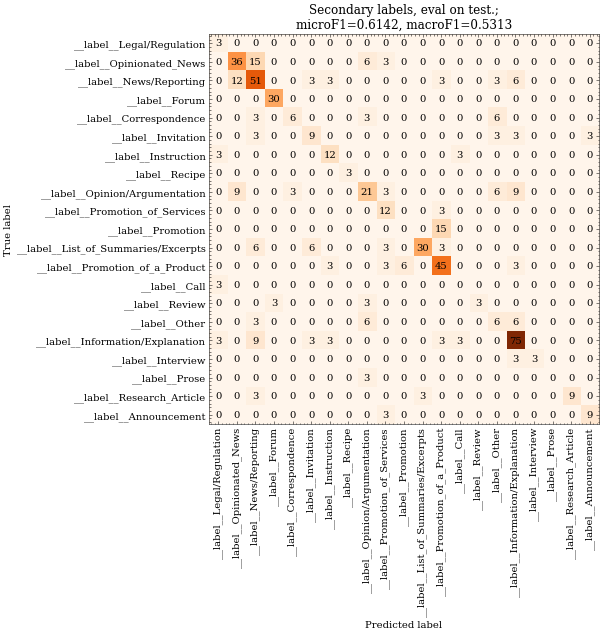

(0.6142131979695431, 0.5312667048053081)

In [65]:
from utils import NUM_TO_STR


plot_cm([NUM_TO_STR[i] for i in y_true_test], [NUM_TO_STR[i] for i in y_pred_test], save="images/19_test.png", 
title="Secondary labels, eval on test.")

microF1=0.6332
macroF1=0.4758


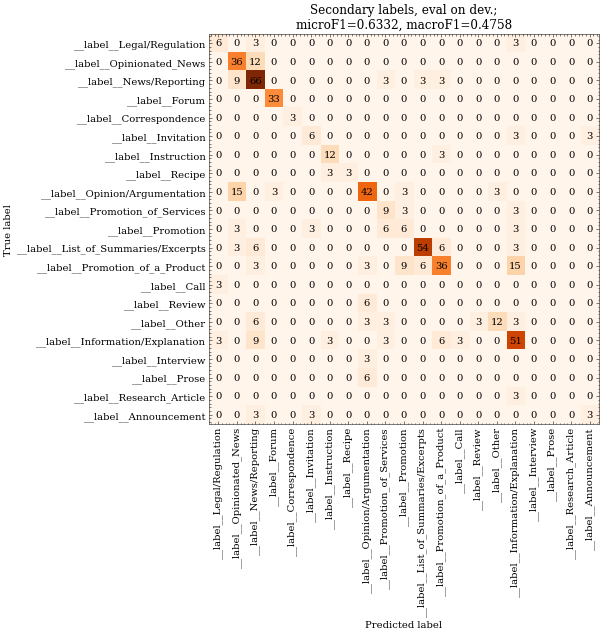

(0.6331658291457286, 0.4757571114920188)

In [66]:
plot_cm([NUM_TO_STR[i] for i in y_true_dev], [NUM_TO_STR[i] for i in y_pred_dev], save="images/19_dev.png", title="Secondary labels, eval on dev.")